In [1]:
import cf_xarray
import gribberish
import xarray as xr

ds = xr.open_dataset('./hrrr.t23z.wrfsubhf01.grib2', engine='gribberish')
ds

['y']


<xarray.Dataset>
Dimensions:               (time_1: 4, y: 1059, x: 1799, time_2: 4, hag_0: 2,
                           time: 4, hag_1: 2)
Coordinates:
  * time                  (time) datetime64[ns] 2023-07-15T23:00:00 ... 2023-...
  * time_1                (time_1) datetime64[ns] 2023-07-15T23:15:00 ... 202...
  * time_2                (time_2) datetime64[ns] 2023-07-15T23:10:00 ... 202...
  * hag_0                 (hag_0) float64 1e+03 4e+03
  * hag_1                 (hag_1) float64 10.0 80.0
  * y                     (y) float64 -1.581e+06 -1.578e+06 ... 1.593e+06
  * x                     (x) float64 -2.701e+06 -2.698e+06 ... 2.693e+06
    latitude              (y, x) float64 ...
    longitude             (y, x) float64 ...
Data variables: (12/27)
    hgt_HGTclt_fcst       (time_1, y, x) float64 ...
    hgt_HGTsfc_fcst       (time_1, y, x) float64 ...
    vgrd_VGRDhag_avgfcst  (time_2, y, x) float64 ...
    cfrzr                 (time_1, y, x) float64 ...
    refd                  (time_1, hag_0, y, x) float64 ...
    gust                  (time_1, y, x) float64 ...
    ...                    ...
    ugrd_UGRDhag_fcst     (time_1, hag_1, y, x) float64 ...
    vgrd_VGRDhag_fcst     (time_1, hag_1, y, x) float64 ...
    crain                 (time_1, y, x) float64 ...
    spfh                  (time_1, y, x) float64 ...
    weasd                 (time, y, x) float64 ...
    retop                 (time_1, y, x) float64 ...
Attributes:
    meta:     Generated with gribberishpy

CPU times: user 175 ms, sys: 53.1 ms, total: 228 ms
Wall time: 228 ms


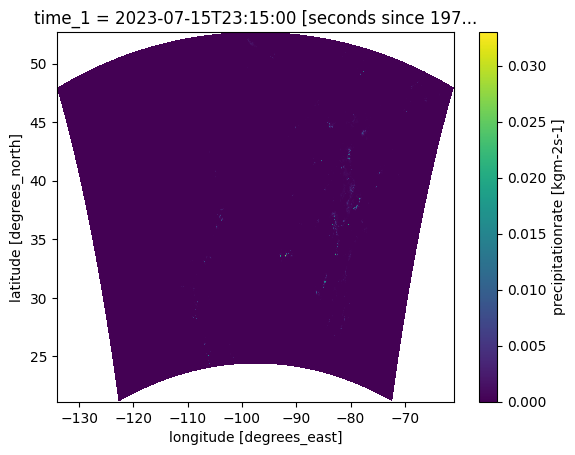

In [3]:
%%time
ds.prate.cf.isel(time=0).plot(x='longitude', y='latitude')

In [4]:
import pyproj
to_xy = pyproj.Transformer.from_crs('epsg:4326', ds.wind.crs, always_xy=True).transform

In [9]:
lat, lng = 41.42717976016072, -71.462122760827

x_sel, y_sel = to_xy(lng, lat)

selected = ds['apcp'].sel(x=x_sel, y=y_sel, method='nearest')
selected.values

array([0.001, 0.   , 0.   , 0.   ])